In [2]:
library("httr")
library("jsonlite")
library("rmarket")
library(ggplot2)
library(forecast)
library(rugarch)

"TWTR", "AMZN", "X", 

Warning message:
“Removed 19 rows containing missing values (geom_path).”Warning message:
“Removed 38 rows containing missing values (geom_path).”Warning message:
“Removed 38 rows containing missing values (geom_path).”

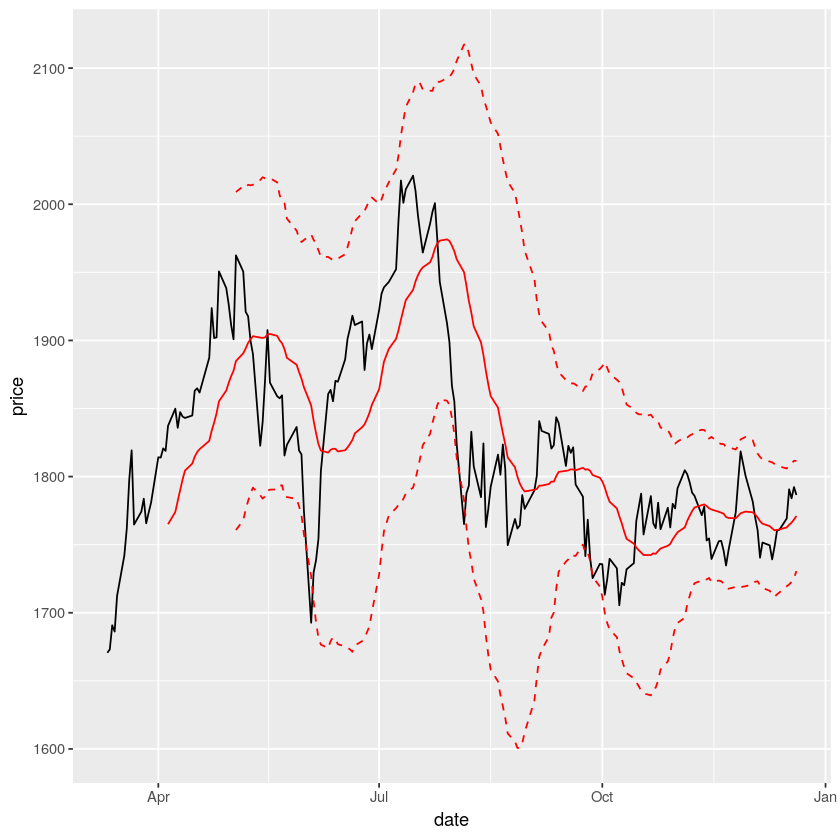

In [3]:
price.df <- get.price.data(ticker="AMZN", length=200)

bbands.df <- bollinger.bands(price.df)
bollinger.bands.plot(bbands.df)

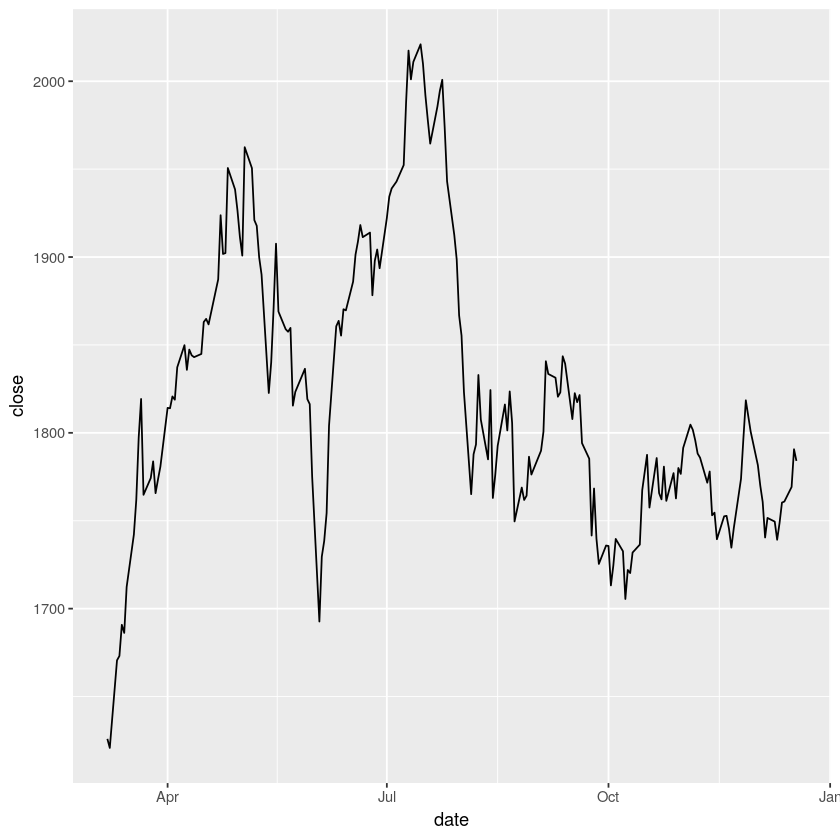

In [10]:
ggplot2::ggplot() +
    geom_line(data=price.df, aes(x=date, y=close), color="black")

In [104]:
return.df <- data.frame(price.df$date[-1], diff(price.df$close)/price.df$close[-length(price.df$close)])
colnames(return.df) <- c("date", "return")

In [62]:
fit <- auto.arima(return.df$return, seasonal=FALSE)

In [67]:
fit <- auto.arima(return.df$return, seasonal=FALSE)
order <- arimaorder(fit)

In [72]:
order

p d q 
0 0 0

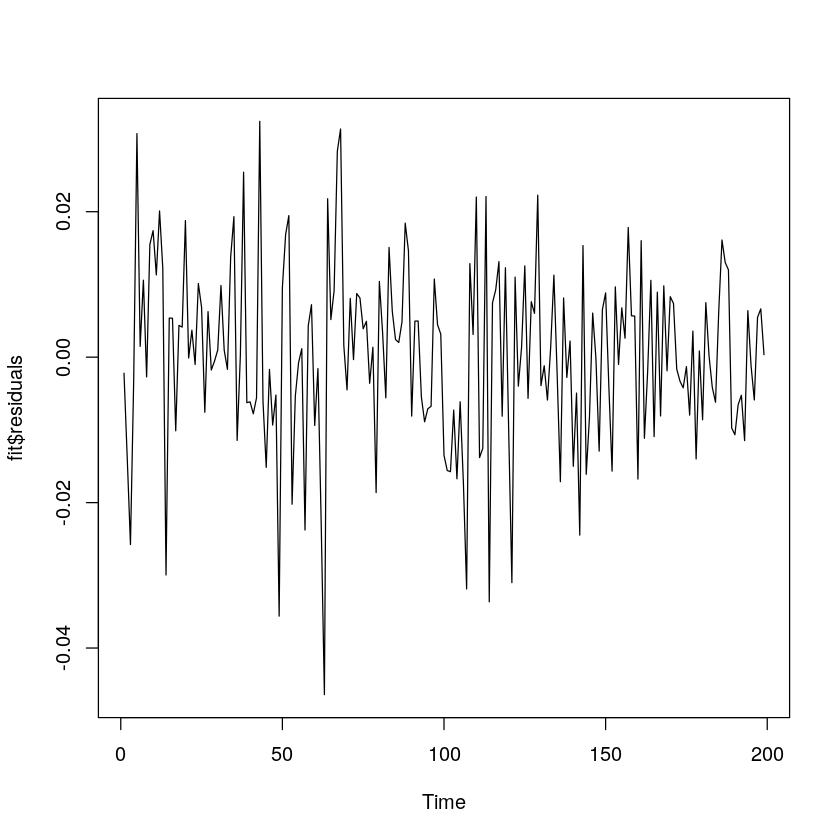

In [73]:
plot(fit$residuals)

In [105]:
garchSpec <- ugarchspec(variance.model=list(model="sGARCH",
                               garchOrder=c(1,1)),
           mean.model=list(armaOrder=c(order[1],order[3])), 
           distribution.model="std")

garchFit <- ugarchfit(spec=garchSpec, data=return.df$return)

In [106]:
garchFit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000570    0.000826  0.69043 0.489922
omega   0.000015    0.000003  4.72692 0.000002
alpha1  0.107287    0.024025  4.46570 0.000008
beta1   0.795750    0.052822 15.06475 0.000000
shape  11.213413    8.107607  1.38307 0.166642

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000570    0.000882  0.64636 0.518049
omega   0.000015    0.000003  4.79385 0.000002
alpha1  0.107287    0.028990  3.70084 0.000215
beta1   0.795750    0.039627 20.08119 0.000000
shape  11.213413    6.613567  1.69552 0.089977

LogLikelihood : 593.1427 

Information Criteria
------------------------------------
                 

In [93]:
res <- residuals(garchFit, standardize=TRUE)


[1] "double"

In [113]:
fit <- auto.arima(return.df$return, seasonal=FALSE)
order <- arimaorder(fit)

garchSpec <- ugarchspec(variance.model=list(model="sGARCH",
                               garchOrder=c(1,1)),
           mean.model=list(armaOrder=c(order[1],order[3])), 
           distribution.model="std")

garchFit <- ugarchfit(spec=garchSpec, data=return.df$return)

date <- return.df$date
conditional.variance <- garchFit@fit$sigma
cvar.df <- data.frame(date, conditional.variance)

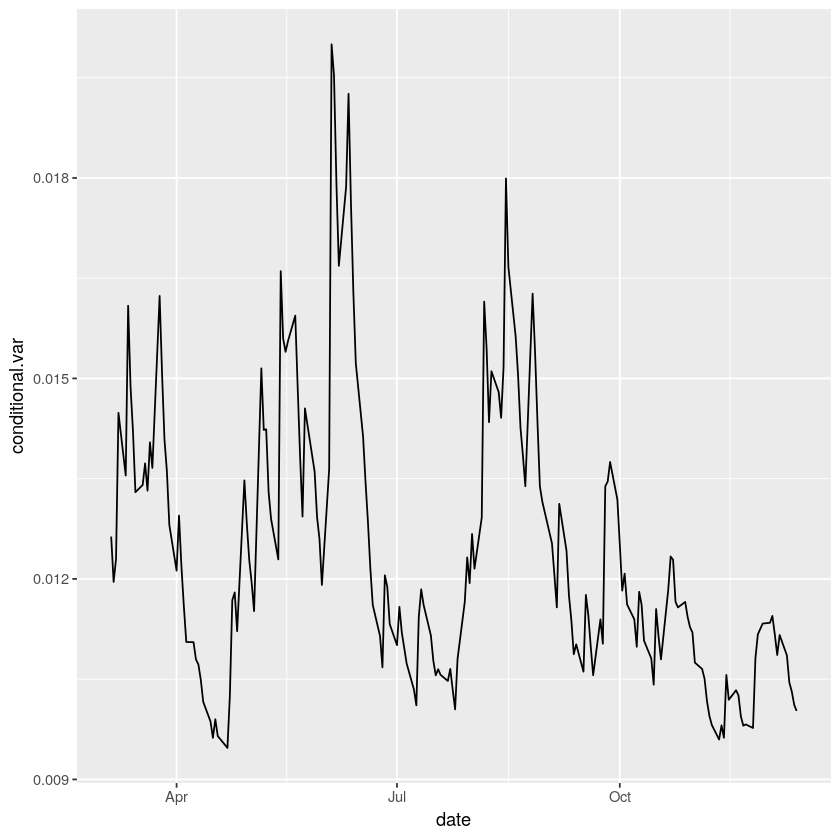

In [114]:
ggplot() + geom_line(data=cond.var.df, aes(x=date, y=conditional.var), color="black")

In [115]:
conditional.var.df

date,conditional.var
<date>,<dbl>
2019-03-05,0.01263424
2019-03-06,0.01195559
2019-03-07,0.01229684
2019-03-08,0.01448522
2019-03-11,0.01354818
2019-03-12,0.01608705
2019-03-13,0.01486988
2019-03-14,0.01420567
2019-03-15,0.01329774


In [ ]:
ggplot2::ggplot() +
    geom_line(data=price.df, aes(x=date, y=close), color="black")